In [1]:
from pylab import *
from IPython.display import Image
from scipy.interpolate import CubicSpline

In [15]:
rcParams['figure.figsize'] = [10, 5]

# Raices

## 1.- 
La velocidad de un cohete que se dispara verticalmente desde la superficie de la tierra puede aproximarse por la siguiente formula:

$$ v = -gt + u \ln \frac{M}{M-kt}.$$

donde 

$u = 2510 m/s $ es la velocidad de escape relativa al cohete.

$M = 2.8x10^{5}kg$ La masa del cohete.

$k = 13.3x10^{3} kg/s$ La proporcion del consumo de combustible.


#### a)
Determina el tiempo cuando el cohete logra la velocidad del sonido $v=355m/s$

C:\Users\adria\AppData\Local\Temp/ipykernel_7992/1017241907.py:9: RuntimeWarning: invalid value encountered in log
  x=v-(-g*t+u*log(M/(M-k*t)))


El tiempo cuando el cohete logra la velocidad del sonido es de 2.9888331323929656 s


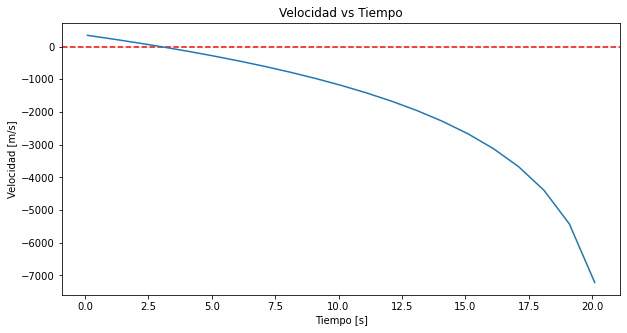

In [49]:
#a)
v=355
g=9.81
u=2510
M=2.8e5
k=13.3e3

def f(t):
    x=v-(-g*t+u*log(M/(M-k*t)))
    return x

t=arange(0.1,500)
axhline(0, color="r", linestyle="--")
title('Velocidad vs Tiempo') 
ylabel('Velocidad [m/s]') 
xlabel('Tiempo [s]')  
plot(t,f(t))

def secante(f, x0, x1, delta):
    start=time.time()
    f0 = f(x0)
    f1 = f(x1)
    contador = 0
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(x2-x1)<delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
        contador=contador+1
    end=time.time()
    tiempo=end-start
#     error=abs(raiz-x2)
    return res, [x2,contador, tiempo]
T=secante(f, 0.1, 3, 1e-9)[-1][0]
print("El tiempo cuando el cohete logra la velocidad del sonido es de", T, "s")


#### b)
Determina el tiempo  cuando el cohete logra la velocidad de escape.

C:\Users\adria\AppData\Local\Temp/ipykernel_7992/1017241907.py:9: RuntimeWarning: invalid value encountered in log
  x=v-(-g*t+u*log(M/(M-k*t)))


El tiempo cuando el cohete logra la velocidad de escape es de 13.711930766383746 s


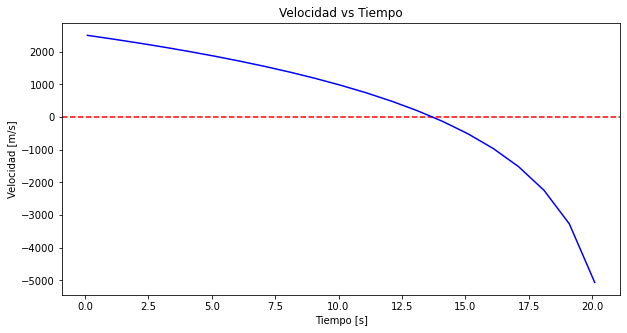

In [26]:
#b)
v=2510
g=9.81
u=2510
M=2.8e5
k=13.3e3
t=arange(0.1,500)
axhline(0, color="r", linestyle="--")
title('Velocidad vs Tiempo') 
ylabel('Velocidad [m/s]') 
xlabel('Tiempo [s]')  
plot(t,f(t), "b")
T=secante(f, 10, 17, 1e-9)[-1][0]
print("El tiempo cuando el cohete logra la velocidad de escape es de", T, "s")

## 2.-
En el campo de la construccion, una viga voladiza es una estructura que esta soportada solo uno de sus lados. La ecuacion que describe la frecuencia de oscilacion de la viga es la siguiente:

$$ f(\beta) = \cosh(\beta)\cos(\beta) + 1. $$

donde 

$\beta_{n}^{4} = (2\pi f_{n})^{2} \frac{mL^{3}}{EI}$

$f_{n}$ La frecuencia enesima

$m, L$ La masa y longitud de la viga

$E$ El modulo de elasticidad

$I$ El momento de inercia de la seccion transversal

#### a) 
Determina dos frecuencias para la viga tales que $f(\beta)=0$.  Considera L= 0.9m,  con una seccion trnasversal rectangular de 25mm de ancho y 25 mm de alto.   La densidad de masa para el acero es de 7850 kg/m**3 y su modulo de elasticidad de 200 GPa.


Las frecuencias donde son cero son:
Frecuencia 1: 25.166071157364918
Frecuencia 2: 157.71308401194577


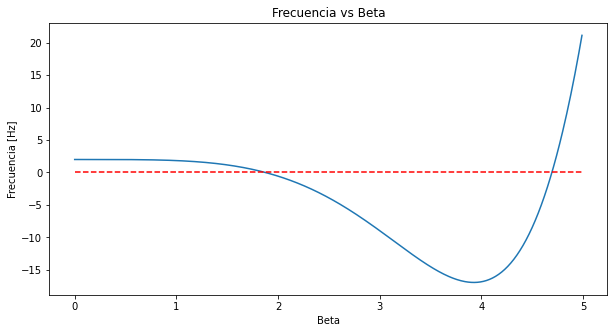

In [28]:
#a)
def f(b):
    y=cosh(b)*cos(b)+ 1
    return y
b=arange(0,5,0.01)
plot(b,f(b))
plot(b,zeros(len(b)),"--r")
title("Frecuencia vs Beta") 
ylabel('Frecuencia [Hz]') 
xlabel('Beta') 

def secante(f, x0, x1, delta):
    start=time.time()
    f0 = f(x0)
    f1 = f(x1)
    contador = 0
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(x2-x1)<delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
        contador=contador+1
    end=time.time()
    tiempo=end-start
#     error=abs(raiz-x2)
    return res, [x2,contador, tiempo]

B1=secante(f,1.5,2.4,10e-5)[-1][0]
B2=secante(f,4,5,10e-5)[-1][0]
d=7850
L=0.9
m=d*L*0.025*0.025
I=(0.025**4)/12
E=2e11
def frecuencia(B):
    f=(1/(2*pi))*sqrt(((B**4)*E*I)/(m*(L**3)))
    return f
print("Las frecuencias donde son cero son:")
print("Frecuencia 1:", frecuencia(B1))
print("Frecuencia 2:", frecuencia(B2))


#### b)
Discute con tus propias palabras lo que sucederia si la viga logra tales frecuencias

##### R=
Cuando la viga voladiza logra tales frecuencias alcanzaria sus frecuencias naturales y entraria en resonancia lo cual los niveles de vibración que resultan pueden ser muy altos y pueden causar daños muy rapidamente.

## 3.-
La siguiente figura  muestra el ciclo termodinamico de un motor.  La eficiencia del motor esta dada por la siguiente expresion:

$\eta = \frac{\ln(T_{2}/T_{1}) + (1 - T_{2}/T_{1})} {\ln(T_{2}/T_{1}) - (1 - T_{2}/T_{1})/(\gamma -1) }.$

#### a) 
Encuentra el valor de $T_{1}$ que logra una eficiencia del 30%, considera $T_{2}$ = 400K, $\gamma = 5/3$ Que tipo de gas hace funcionar al motor?

C:\Users\adria\AppData\Local\Temp/ipykernel_9716/2729924505.py:5: RuntimeWarning: invalid value encountered in true_divide
  x= (log(T2/T1) + (1- (T2/T1))) / (log(T2/T1)-(1-(T2/T1))/(G-1))


La temperatura T1 que logra una eficiencia de 30% es: T1=  2165.019297040999 K


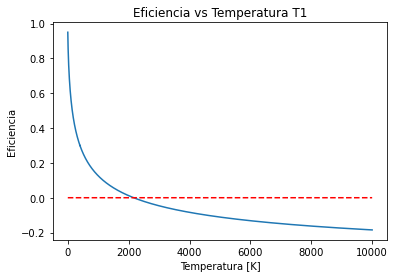

In [3]:
#a)
T2=400
G=5/3
def f(T1):
    x= (log(T2/T1) + (1- (T2/T1))) / (log(T2/T1)-(1-(T2/T1))/(G-1))
    return 0.3- x
T1=arange(1,10000)
plot(T1,f(T1))
title('Eficiencia vs Temperatura T1') 
ylabel('Eficiencia') 
xlabel('Temperatura [K]') 
plot(T1,zeros(len(T1)),"--r")

#Método de bisección
def biseccion(f,a,b,eps=1e-6):
    contador=0 #Definimos el contador de pasos
    dx=abs(b-a) #Distancia del intervalo

    while dx>eps:
        x=(a+b)/2.0 #Dividimos el intervalo
        if (f(a)*f(x))<0: #Si cambia d signo en la primera mitad
            b=x #Redefinimos el intervalo
        elif (f(x)*f(b))<0: #Si cambia de signo en el lado derecho
            a=x #Redefinimos el intervalo
        else:
            dx=eps/2
            print('El intervalo no tiene raíz, hay más de una o no cruza el eje')
            break
        dx=abs(b-a) #Renombramos el intervalo
        contador=contador+1
    return [x, contador]

print("La temperatura T1 que logra una eficiencia de 30% es: T1= ",biseccion(f, 2000,4000,1e-6)[0],"K")


##### R=
El gas que hace funcionar a este motor es un gas monoatómico, podemos notarlo en su valor de $\gamma$

 
#### b) 
Repite el proceso para $\gamma = 7/5$. 


La temperatura T1 que logra una eficiencia de 30% es: T1=  3725.947388447821 K


C:\Users\adria\AppData\Local\Temp/ipykernel_9716/2729924505.py:5: RuntimeWarning: invalid value encountered in true_divide
  x= (log(T2/T1) + (1- (T2/T1))) / (log(T2/T1)-(1-(T2/T1))/(G-1))


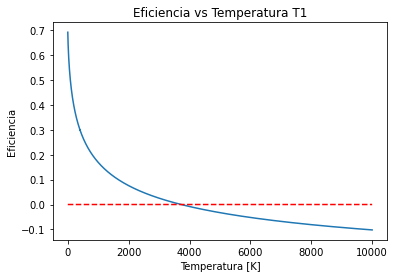

In [4]:
T2=400
G=7/5
T1=arange(1,10000)
plot(T1,f(T1))
title('Eficiencia vs Temperatura T1') 
ylabel('Eficiencia') 
xlabel('Temperatura [K]') 
plot(T1,zeros(len(T1)),"--r")
print("La temperatura T1 que logra una eficiencia de 30% es: T1= ",biseccion(f, 3000,5000,1e-6)[0],"K")

##### R=
El gas que hace funcionar este motor es un gas diatómico

#### c)
Realiza una grafica donde muestres la variacion de la eficiencia al aumentar $T_{2}$. Discute la grafica y el significado fisico del sistema, recuerda analizar los casos limite.

Text(0.5, 0, 'Temperatura [K]')

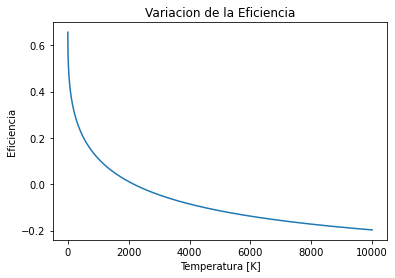

In [7]:
#c)
T1=2165.019297040999
T2= arange(1,10000)
def f(T2):
    x= (log(T2/T1) + (1- (T2/T1))) / (log(T2/T1)-(1-(T2/T1))/(G-1))
    return x
plot(T2, f(T2))
title('Variacion de la Eficiencia') 
ylabel('Eficiencia') 
xlabel('Temperatura [K]')

##### R=
Como se puede observar se obtiene mejor eficiencia del motor cuando se acerca al cero absoluto, pero no podemos alcanzar la eficiencia en el cero absoluto, debido a que segun la 3era ley de la termodinamica no se puede alcanzar el cero absoluto en un número finito de etapas.

In [ ]:
Image(filename='Ciclo.png') 

## 4.-

Un problema elemental en mecanica cuantica, es encontrar las energias de estados ligados en un pozo de potencial con profundidad P. Las energias de los estados ligados son soluciones  de las siguientes ecuaciones trascendentales:

$\sqrt{P - E_{B}}\tan\left ( \sqrt{P - E_{B}} \right ) = \sqrt{E_{B}}.$ Para funciones de onda pares

$\frac{\sqrt{P - E_{B}}}{\tan\left ( \sqrt{P - E_{B}} \right )} = \sqrt{E_{B}}.$ Para funciones de onda impares

#### a)
Encuentra las soluciones en ambos casos para 2 valores de la profundidad del pozo. 


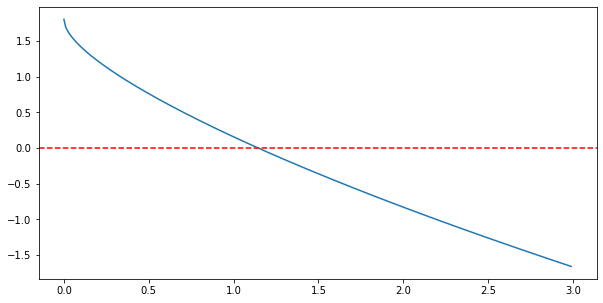

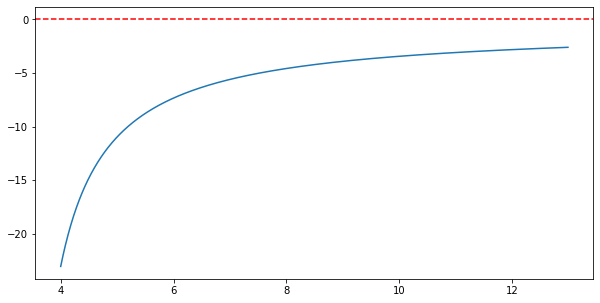

Para P= 13  el valor de E_b es:
Para la funcion par:  1.1457128524780273
Para la funcion impar no hay valor para E_b


In [67]:
# a)
def f_par(E_b):
    return sqrt(P - E_b)*tan(sqrt(P-E_b))- sqrt(E_b)

def f_impar(E_b):
    return sqrt(P - E_b)/(tan(sqrt(P-E_b)))- sqrt(E_b)
P=13

E_par=arange(0,3,0.01)
E_impar=arange(4,13,0.01)

plot(E_par, f_par(E_par))
axhline(0, color="r", linestyle="--")
show()
plot(E_impar, f_impar(E_impar))
axhline(0, color="r", linestyle="--")
show()

print("Para P=", P," el valor de E_b es:")
print("Para la funcion par: ", biseccion(f_par,1,2,1e-6)[0] )
print("Para la funcion impar no hay valor para E_b")

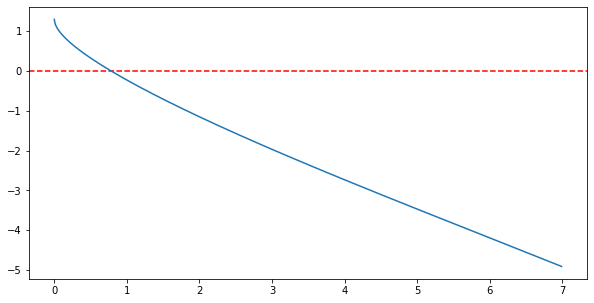

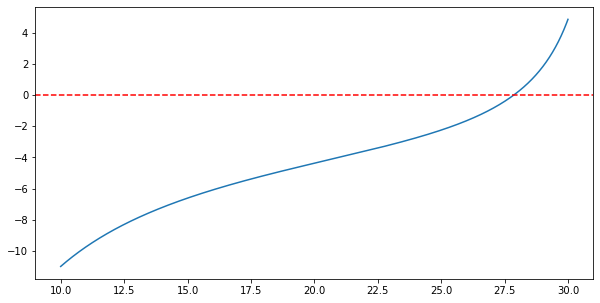

Para P= 42  el valor de E_b es:
Para la funcion par:  0.7823652029037476
Para la funcion impar:  27.857361435890198


In [54]:
def f_par(E_b):
    return sqrt(P - E_b)*tan(sqrt(P-E_b))- sqrt(E_b)

def f_impar(E_b):
    return sqrt(P - E_b)/(tan(sqrt(P-E_b)))- sqrt(E_b)
P=42

E_par=arange(0,7,0.01)
E_impar=arange(10,30,0.01)
axhline(0, color="r", linestyle="--")
plot(E_par, f_par(E_par))
show()
plot(E_impar, f_impar(E_impar))
axhline(0, color="r", linestyle="--")
show()
print("Para P=", P," el valor de E_b es:")
print("Para la funcion par: ", biseccion(f_par,0,7,1e-6)[0] )
print("Para la funcion impar: ", biseccion(f_impar,25,30,1e-6)[0] )


In [ ]:
def f_impar(P):
    return sqrt(P - E_b)/(tan(sqrt(P-E_b)))- sqrt(E_b) 
E_b=3.14
P=arange(40,60,0.001)
plot(P,f_impar(P))

#### b) 
Discute con tus propias palabras la relacion entre la profundidad del pozo de potencial y los estados ligados, tanto para funciones pares como impares. 